* CS6243, EE4463, EE5573
* Team 13 - Kosi Atupulazi, Ellen Ojo, Rob Grau
* March 6, 2025
* Homework 2

## Problem 0 - Data Import ##

In [1]:
# Declarations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# mount drive location with .csv files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/Colab Notebooks/ML Class Files"


FISHDTE.csv  FISHDTR.csv  HW2_A.csv  HW2_xinit.csv  HW2_y.csv


In [4]:
### PROBLEM 0 ###
# Load arrays A, y, and xinit from the csv files provided in this assignment. Denote by N and K the
# rows and columns of A, respectively. Consider the least squares (LS) problem xopt = arg minx∈RK L(x),
# where L(x) = ∥Ax − y∥2

A = "/content/drive/My Drive/Colab Notebooks/ML Class Files/HW2_A.csv"
y = "/content/drive/My Drive/Colab Notebooks/ML Class Files/HW2_y.csv"
xinit = "/content/drive/My Drive/Colab Notebooks/ML Class Files/HW2_xinit.csv"



In [5]:
# Load CSVs with space as the delimiter
A = pd.read_csv(A, header=None, sep='\s+').values
y = pd.read_csv(y, header=None, sep='\s+').values
xinit = pd.read_csv(xinit, header=None, sep='\s+').values

In [6]:
N = A.shape[0]
K = A.shape[1]

In [7]:
# Print shapes to verify
print("A shape:", A.shape)  # (N, K)
print("y shape:", y.shape)  # (N, 1) or (N,)
print("xinit shape:", xinit.shape)  # (K, 1) or (K,)
print("N:", N, "K:", K)

A shape: (100, 50)
y shape: (100, 1)
xinit shape: (50, 1)
N: 100 K: 50


## Problem 1 - Derivations ##

1a. Derive the gradient of L(x)

Start with least squares loss function:
$$
\begin{equation}
L(x) = \|y - Ax\|_2^2
\end{equation}
$$

Expand the quadratic equation:
$$
\begin{equation}
\|y - Ax\|_2^2 = (y-Ax){^\top}(y-Ax)
\end{equation}
$$
$$
\begin{equation}
(y-Ax){^\top}(y-Ax) = x{^\top}A{^\top}Ax - y{^\top}Ax - x{^\top}A{^\top}y + y{^\top}y
\end{equation}
$$

Calculate the gradient:
$$
\begin{equation}
\nabla_x L(x) = \nabla_x(x{^\top}A{^\top}Ax - y{^\top}Ax - x{^\top}A{^\top}y + y{^\top}y)
\end{equation}
$$

The gradient of individual parts is as follows:
$$
\begin{equation}
\nabla_x(x{^\top}A{^\top}Ax ) = 2A{^\top}Ax
\end{equation}
$$
$$
\begin{equation}
\nabla_x (- y{^\top}Ax) = - y{^\top}A
\end{equation}
$$
$$
\begin{equation}
\nabla_x (- x{^\top}A{^\top}y) = - A{^\top}y
\end{equation}
$$
$$
\begin{equation}
\nabla_x (y{^\top}y) = 0
\end{equation}
$$

We should note that:
$$
\begin{equation}
 (- A{^\top}y) \text{ and } (- y{^\top}A) \text{ are the same term.}
\end{equation}
$$

So the terms combine as follows:
$$
\begin{equation}
\nabla_x L(x) = 2(A{^\top}Ax - A{^\top}y)
\end{equation}
$$

1b. Derive the Hessian of L(x)

The Hessian is the second order derivative of L(x), which is taking the gradient of the gradient of L(x).

To derive this, we can start back with the gradient of L(x), which is as follows:
$$
\begin{equation}
\nabla_x L(x) = 2(A{^\top}Ax - A{^\top}y)
\end{equation}
$$

And then we take another gradient:
$$
\begin{equation}
H = \nabla_x{^\top}\nabla_x L(x) = \nabla_x{^\top} (2A{^\top}Ax - 2A{^\top}y)
\end{equation}
$$

The terms individually have gradients as follows:
$$
\begin{equation}
 \nabla_x{^\top} (2A{^\top}Ax) = 2A{^\top}A
\end{equation}
$$
$$
\begin{equation}
 \nabla_x{^\top} (- 2A{^\top}y) = 0
\end{equation}
$$

Which combined gives the result:
$$
\begin{equation}
2A{^\top}A
\end{equation}
$$

1c. Derive the Lipschitz contstant C

The constant is defined as:
$$
C = \sup_{x\in F}\sigma_{max}(H(x))
$$

We happen to know that Least Squares is a quadratic function which means that it is a special case and H is a constant point across all points x in the domain which means are equation for C simplifies to:

$$
C = \sigma_{max}(H)
$$

We can substitute H from the previous derivation which gives us:

$$
C = \sigma_{max}(2A{^\top}A)
$$

Then we can factor out the 2 and we can rewrite C as:

$$
C = 2\sigma_{max}(A)^2
$$


1d. Derive closed form solution of LS by means of SVD.


The gradient of L(x) for least squares is:
$$
\begin{equation}
\nabla_x L(x) = 2(A{^\top}Ax - A{^\top}y)
\end{equation}
$$
The optimal value for L is zero, so let's define it as such
$$
\begin{equation}
L_{opt} = 0
\end{equation}
$$
Then we want to find an optimal X such that L is zero.
$$
\begin{equation}
\nabla_x L(x) \mid x_{opt} = 0
\end{equation}
$$
Next we substitute these items into our gradient equation.
$$
\begin{equation}
2(A{^\top}Ax_{opt} - A{^\top}y) = 0
\end{equation}
$$
$$
\begin{equation}
A{^\top}Ax_{opt} = A{^\top}y
\end{equation}
$$
Next, Recall the Reduced SVD decomposition-
$$
\begin{equation}
A = UΣV{^\top}
\end{equation}
$$
Substituting R-SVD into $A{^\top}A$ we get:
$$
\begin{equation}
A{^\top}A = (UΣV{^\top}){^\top}(UΣV{^\top})
\end{equation}
$$
$$
\begin{equation}
 = VΣ{^\top}U{^\top}UΣV{^\top}
\end{equation}
$$
Further simplifying gives us
$$
\begin{equation}
 VΣ^2V{^\top}
\end{equation}
$$
Returning to our System of Linear Equations, we can now take
$$
\begin{equation}
A{^\top}Ax_{opt} = A{^\top}y
\end{equation}
$$
and substitute the terms from the R-SVD as follows:
$$
\begin{equation}
x_{opt} = VΣ^{-2}V{^\top}VΣ{^\top}U{^\top}y + b
\end{equation}
$$
which simplifies to:
$$
\begin{equation}
x_{opt} = VΣ^{-1}U{^\top}y + b
\end{equation}
$$
where $b\in null(A)$

## Problem 2: Computations

In [8]:
# H - Hessian Matrix computation

H = 2*np.dot(A.T, A)
print(H)

[[191.37670132  21.02603409  -6.82631768 ...  -4.91549312  -6.78524379
    8.9469785 ]
 [ 21.02603409 219.34947213  -8.92060565 ...   6.64226026  -0.26495068
   22.82259033]
 [ -6.82631768  -8.92060565 193.49150549 ...   4.38754122  20.95915189
   -2.37970363]
 ...
 [ -4.91549312   6.64226026   4.38754122 ... 260.02628108  20.17156254
   -9.09324095]
 [ -6.78524379  -0.26495068  20.95915189 ...  20.17156254 159.02347483
   15.44256817]
 [  8.9469785   22.82259033  -2.37970363 ...  -9.09324095  15.44256817
  152.18963305]]


In [9]:
# C - Lipschitz Constant computation

#C=2σmax(A)2

# Step 1: Compute the singular values of A
U, S, Vt = np.linalg.svd(A)
# Step 2: Get the maximum singular value (sigma_max)
sigma_max = np.max(S)
# Step 3: Square the maximum singular value
sigma_max_squared = sigma_max**2
# Step 4: Multiply by 2 to get C
C = 2 * sigma_max_squared

print("C:", C)



C: 565.037271286706


In [10]:
# Compute LS solutions xopt and Lopt by means of SVD

# from derivation xopt is VΣ^−1U⊤y+b, when can pick any b, so we choose b=0 for simplicity.
# Let's start with SVD to get the component matricies.
U, S, Vt = np.linalg.svd(A)

# Reconstruct Sigma Matrix from 1D array and add zeroes because A is non-square
sigma = np.vstack([np.diag(S), np.zeros((50, 50))])
sigma.shape

# Get sigma inverse (pseudo inverse because of the non-square zero padding in the previous step)
sig_inverse = np.linalg.pinv(sigma)

# Now compute xopt
xopt = Vt.T @ sig_inverse @ U.T @ y
print(xopt)

[[-0.08121027]
 [ 0.04875868]
 [ 0.06883142]
 [ 0.01409853]
 [-0.07782291]
 [ 0.12053199]
 [-0.07470934]
 [-0.02758252]
 [-0.0464538 ]
 [-0.05075279]
 [ 0.46539549]
 [ 0.11978977]
 [ 0.10058173]
 [ 0.0627219 ]
 [-0.20474367]
 [ 0.21146524]
 [ 0.07532722]
 [ 0.01633568]
 [-0.00535897]
 [-0.03948962]
 [-0.25297939]
 [-0.06094446]
 [-0.00413265]
 [-0.12720141]
 [-0.22386852]
 [-0.01423569]
 [ 0.17411127]
 [ 0.15673548]
 [ 0.0242541 ]
 [-0.00232161]
 [ 0.0920477 ]
 [-0.09587185]
 [ 0.11029472]
 [ 0.17010987]
 [-0.07635748]
 [ 0.04820871]
 [-0.11671416]
 [-0.002739  ]
 [-0.08280178]
 [ 0.12118255]
 [-0.19370392]
 [-0.22297222]
 [-0.04036722]
 [-0.0146659 ]
 [-0.01513274]
 [-0.10559121]
 [-0.1402465 ]
 [ 0.06170068]
 [ 0.3609403 ]
 [-0.13134697]]


In [11]:
# Next, Lopt is the value of the loss function when parameter xopt is applied.

# Define loss function L(x) = ||Ax - y||^2 --we'll need this a lot later, so we're creating a function now.
def loss(A, x, y):
    return np.linalg.norm(A @ x - y)**2

Lopt = loss(A, xopt, y)
print(Lopt)

37.511376078391216


## Problem 3 - Least Squares Gradient Descent with Exact Line Search

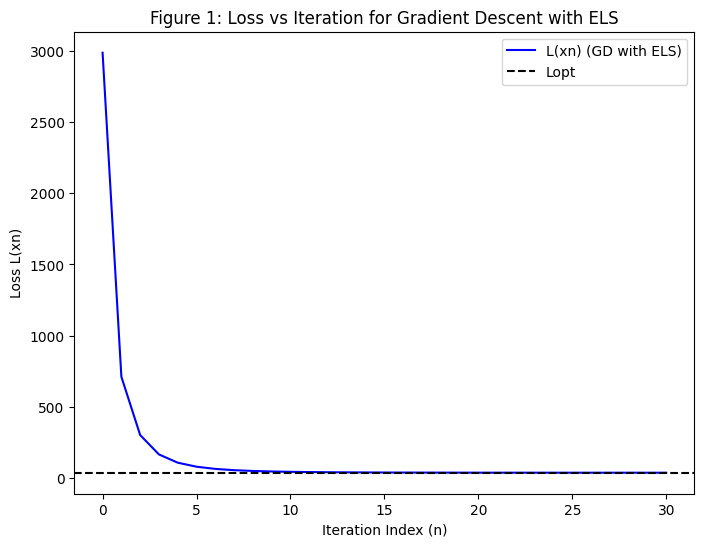

In [12]:
# Initialize x-values and loss storage
x_values = [xinit.copy()]
loss_values = [loss(A, xinit, y)]

# Grab the largest sigma value, then compute Lipschitz constant C with it, since C is 2 * sigma_max^2 in the special case of Least Squares.
sigma_max = max(S)
C = 2 * sigma_max**2
# initial gamma is 1/C
inv_C = 1 / C

# Initialize storage for γₙ values
gamma_values = []

# Gradient Descent Loop
x = xinit.copy()
for n in range(30):
    grad = 2 * A.T @ (A @ x - y)  # Compute gradient
    gamma_n = (grad.T @ grad).item() / (2 * (grad.T @ A.T @ A @ grad).item())  # Ensure scalar
    x = x - gamma_n * grad  # Update x
    gamma_values.append(gamma_n)
    x_values.append(x.copy())
    loss_values.append(loss(A, x, y))

# Plot Loss vs Iteration
plt.figure(figsize=(8, 6))
plt.plot(range(31), loss_values, 'b-', label="L(xn) (GD with ELS)")
plt.axhline(y=Lopt, color='black', linestyle='dashed', label="Lopt")
plt.xlabel("Iteration Index (n)")
plt.ylabel("Loss L(xn)")
plt.title("Figure 1: Loss vs Iteration for Gradient Descent with ELS")
plt.legend()
plt.show()




Discussion for Problem 3, Figure 1

We see in the figure the loss for each iteration of $x_n$. As the iterations increase, the loss approaches and converges on $L_{opt}$.  Convergence happens before n=15, likely at n=12 or 13.  The fact that convergence happened means that our 1/C initial gamma was not too large.

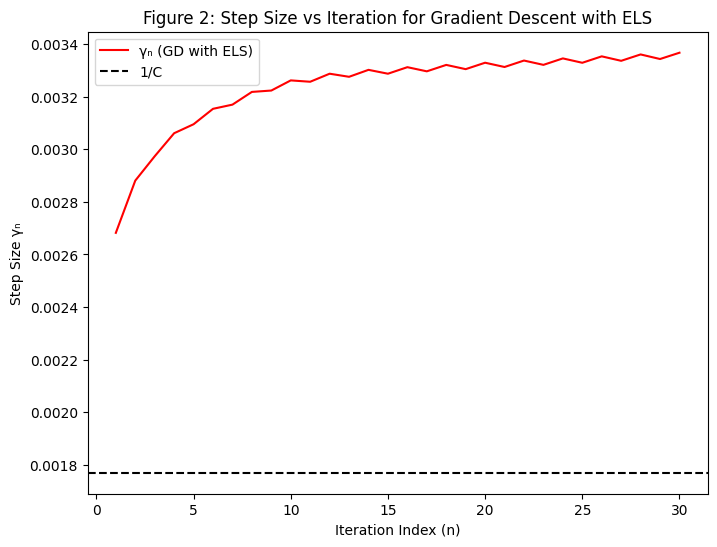

In [13]:
# Plot Step Size vs Iteration
plt.figure(figsize=(8, 6))
plt.plot(range(1, 31), gamma_values, 'r-', label="γₙ (GD with ELS)")
plt.axhline(y=inv_C, color='black', linestyle='dashed', label="1/C")
plt.xlabel("Iteration Index (n)")
plt.ylabel("Step Size γₙ")
plt.title("Figure 2: Step Size vs Iteration for Gradient Descent with ELS")
plt.legend()
plt.show()

Discussion for Problem 3, Figure 2

The step size actual increases as the iterations increase, although, it started at a very small value of about .0027.  The "wiggle" in the line shows that the model is changing the step size in different amounts as it attempts to find the best fit.  

## Problem 4 - Fixed Step Size ##

In [14]:
# Problem 4 Gradient Descent with fixed step size

# Calculate step size (fixed).  We actually did this earlier.  It's essentially the Lipschitz constant C, with the step
# size (gamma) being 1/C.

# We're asked to graph gamma with some scaling factors, so the variables below are each of the different gammas that we will use.

fixed_gamma = 1/C
fixed_gamma_p1 = fixed_gamma * 0.1
fixed_gamma_p2 = fixed_gamma * 0.5
fixed_gamma_p3 = fixed_gamma * 1
fixed_gamma_p4 = fixed_gamma * 1.5
fixed_gamma_p5 = fixed_gamma * 2

In [15]:
# Then the formula is Xn = xn-1 - gamma*g(xn-1)
# Least Squares g(x) function is (A transpose Ax - A transpose y)*2

def LSgradient(A, x, y):
    return (A.T @ A @ x - A.T @ y) * 2

# compute GD with Fixed Step Size for each p.  Also capture Loss L(x) for each point since we will need to plot it in
# the next step.
xfs_p1 = xinit.copy()
xfs_p2 = xinit.copy()
xfs_p3 = xinit.copy()
xfs_p4 = xinit.copy()
xfs_p5 = xinit.copy()
xfs_values_p1 = []
xfs_values_p2 = []
xfs_values_p3 = []
xfs_values_p4 = []
xfs_values_p5 = []
loss_p1 = []
loss_p2 = []
loss_p3 = []
loss_p4 = []
loss_p5 = []
for n in range(30):
    xfs_p1 = xfs_p1 - fixed_gamma_p1 * LSgradient(A, xfs_p1, y)
    xfs_values_p1.append(xfs_p1.copy())
    losstemp = loss(A, xfs_p1, y)
    loss_p1.append(losstemp)
    xfs_p2 = xfs_p2 - fixed_gamma_p2 * LSgradient(A, xfs_p2, y)
    xfs_values_p2.append(xfs_p2.copy())
    losstemp = loss(A, xfs_p2, y)
    loss_p2.append(losstemp)
    xfs_p3 = xfs_p3 - fixed_gamma_p3 * LSgradient(A, xfs_p3, y)
    xfs_values_p3.append(xfs_p3.copy())
    losstemp = loss(A, xfs_p3, y)
    loss_p3.append(losstemp)
    xfs_p4 = xfs_p4 - fixed_gamma_p4 * LSgradient(A, xfs_p4, y)
    xfs_values_p4.append(xfs_p4.copy())
    losstemp = loss(A, xfs_p4, y)
    loss_p4.append(losstemp)
    xfs_p5 = xfs_p5 - fixed_gamma_p5 * LSgradient(A, xfs_p5, y)
    xfs_values_p5.append(xfs_p5.copy())
    losstemp = loss(A, xfs_p5, y)
    loss_p5.append(losstemp)

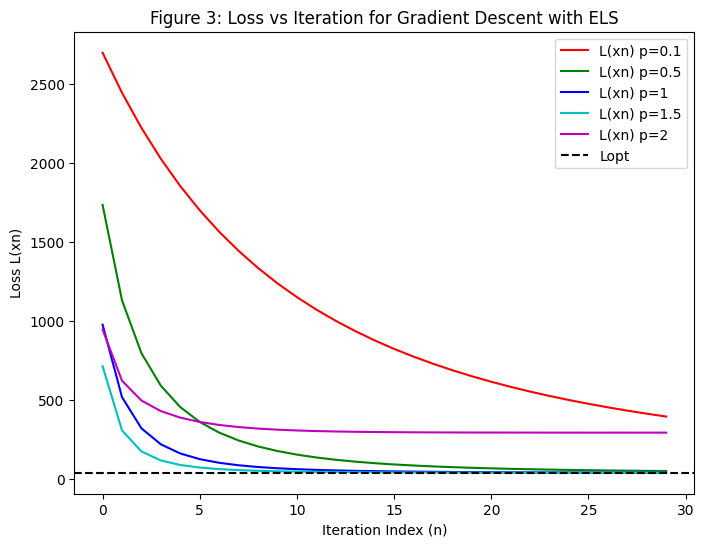

In [16]:
# Plot L(x) for each iteration. Loss was calculated during GD steps above.

plt.figure(figsize=(8, 6))
plt.plot(range(30), loss_p1, 'r-', label="L(xn) p=0.1")
plt.plot(range(30), loss_p2, 'g-', label="L(xn) p=0.5")
plt.plot(range(30), loss_p3, 'b-', label="L(xn) p=1")
plt.plot(range(30), loss_p4, 'c-', label="L(xn) p=1.5")
plt.plot(range(30), loss_p5, 'm-', label="L(xn) p=2")
plt.axhline(y=Lopt, color='black', linestyle='dashed', label="Lopt")
plt.xlabel("Iteration Index (n)")
plt.ylabel("Loss L(xn)")
plt.title("Figure 3: Loss vs Iteration for Gradient Descent with ELS")
plt.legend()
plt.show()



Discussion for Problem 4.

When the scaling factor makes the step size very small, it takes a long time to converge on Lopt.  For p = 0.1, it does not converge in the first 30 iterations however as the slope is still decreasing it appears that it will converge eventually.

For the scaling factors of p=1.5 and p=2, there's no guarantee that the gradient descent will converge.  Despite this, for p=1.5 the graph still converges.

On the other hand, for p=2 the step size is scaled to the point that it is too large and it does not converge on Lopt and the slope (essentially flat) tels us that it will never converge.

## Problem 5 - Backtracking Line Search##

In [17]:
## Problem 5 - Backtracking Line Search

# need time library
import time

# define hyperparameters for backtracking line search
# I have separate values of c and n (aka B) because we're going to run the model multiple times

little_c1 = 0.1
little_c2 = 0.01
learnrate_bn1 = 0.1
learnrate_bn2 = 0.2
learnrate_bn3 = 0.5
learnrate_bn4 = 0.9

# Below are a number of list objects used to capture variables for plotting later in the problem.
gamma_bls_bn1= []
gamma_bls_bn2= []
gamma_bls_bn3= []
gamma_bls_bn4= []
gamma_bls_c1= []
gamma_bls_c2= []

x_bls_bn1 = xinit.copy()
x_bls_bn2 = xinit.copy()
x_bls_bn3 = xinit.copy()
x_bls_bn4 = xinit.copy()
x_bls_c1 = xinit.copy()
x_bls_c2 = xinit.copy()
x_bls_bn1_values = []
x_bls_bn2_values = []
x_bls_bn3_values = []
x_bls_bn4_values = []
x_bls_c1_values = []
x_bls_c2_values = []

x_bls_values = []
loss_bls_bn1 = []
loss_bls_bn2 = []
loss_bls_bn3 = []
loss_bls_bn4 = []
loss_bls_c1 = []
loss_bls_c2 = []

# In each of the loops below-
# the while loop calculates (Loss(xn-1) - Loss(xn-1 - gamma * gradient(xn-1))) and compares it to little_c * learnrate * norm of gradient(xn-1)^2
# if first term is less than or equal to second term, new gamma is generated that is the learnrate times gamma.

# Run c= 0.1 n = 0.1

# Init gamma with 0.1
gamma_current = 0.1
gamma_bls_bn1.append(gamma_current)
start_time_bn1 = time.time()
for n in range(30):
    x_bls_bn1 = x_bls_bn1 - gamma_current * LSgradient(A, x_bls_bn1, y)
    x_bls_bn1_values.append(x_bls_bn1.copy())
    # calc new gamma_current
    term1 = loss(A, x_bls_bn1, y) - loss(A, x_bls_bn1 - gamma_current * LSgradient(A, x_bls_bn1, y), y)
    term2 = little_c1 * gamma_current * np.linalg.norm(LSgradient(A, x_bls_bn1, y))**2
    while term1 <= term2:
        gamma_current = learnrate_bn1 * gamma_current
        term1 = loss(A, x_bls_bn1, y) - loss(A, x_bls_bn1 - gamma_current * LSgradient(A, x_bls_bn1, y), y)
        term2 = little_c1 * gamma_current * np.linalg.norm(LSgradient(A, x_bls_bn1, y))**2
    gamma_bls_bn1.append(gamma_current)
    losstemp = loss(A, x_bls_bn1, y)
    loss_bls_bn1.append(losstemp)
end_time_bn1 = time.time()

# Run c= 0.1 n = 0.2

# Init gamma with 0.1
gamma_current = 0.1
gamma_bls_bn2.append(gamma_current)
start_time_bn2 = time.time()
for n in range(30):
    x_bls_bn2 = x_bls_bn2 - gamma_current * LSgradient(A, x_bls_bn2, y)
    x_bls_bn2_values.append(x_bls_bn2.copy())
    # calc new gamma_current
    term1 = loss(A, x_bls_bn2, y) - loss(A, x_bls_bn2 - gamma_current * LSgradient(A, x_bls_bn2, y), y)
    term2 = little_c1 * gamma_current * np.linalg.norm(LSgradient(A, x_bls_bn2, y))**2
    while term1 <= term2:
        gamma_current = learnrate_bn2 * gamma_current
        term1 = loss(A, x_bls_bn2, y) - loss(A, x_bls_bn2 - gamma_current * LSgradient(A, x_bls_bn2, y), y)
        term2 = little_c1 * gamma_current * np.linalg.norm(LSgradient(A, x_bls_bn2, y))**2
    gamma_bls_bn2.append(gamma_current)
    losstemp = loss(A, x_bls_bn2, y)
    loss_bls_bn2.append(losstemp)
end_time_bn2 = time.time()

# Run c= 0.1 n = 0.5

# Init gamma with 0.1
gamma_current = 0.1
gamma_bls_bn3.append(gamma_current)
start_time_bn3 = time.time()
for n in range(30):
    x_bls_bn3 = x_bls_bn3 - gamma_current * LSgradient(A, x_bls_bn3, y)
    x_bls_bn3_values.append(x_bls_bn3.copy())
    # calc new gamma_current
    term1 = loss(A, x_bls_bn3, y) - loss(A, x_bls_bn3 - gamma_current * LSgradient(A, x_bls_bn3, y), y)
    term2 = little_c1 * gamma_current * np.linalg.norm(LSgradient(A, x_bls_bn3, y))**2
    while term1 <= term2:
        gamma_current = learnrate_bn3 * gamma_current
        term1 = loss(A, x_bls_bn3, y) - loss(A, x_bls_bn3 - gamma_current * LSgradient(A, x_bls_bn3, y), y)
        term2 = little_c1 * gamma_current * np.linalg.norm(LSgradient(A, x_bls_bn3, y))**2
    gamma_bls_bn3.append(gamma_current)
    losstemp = loss(A, x_bls_bn3, y)
    loss_bls_bn3.append(losstemp)
end_time_bn3 = time.time()

# Run c= 0.1 n = 0.9

# Init gamma with 0.1
gamma_current = 0.1
gamma_bls_bn4.append(gamma_current)
start_time_bn4 = time.time()
for n in range(30):
    x_bls_bn4 = x_bls_bn4 - gamma_current * LSgradient(A, x_bls_bn4, y)
    x_bls_bn4_values.append(x_bls_bn4.copy())
    # calc new gamma_current
    term1 = loss(A, x_bls_bn4, y) - loss(A, x_bls_bn4 - gamma_current * LSgradient(A, x_bls_bn4, y), y)
    term2 = little_c1 * gamma_current * np.linalg.norm(LSgradient(A, x_bls_bn4, y))**2
    while term1 <= term2:
        gamma_current = learnrate_bn4 * gamma_current
        term1 = loss(A, x_bls_bn4, y) - loss(A, x_bls_bn4 - gamma_current * LSgradient(A, x_bls_bn4, y), y)
        term2 = little_c1 * gamma_current * np.linalg.norm(LSgradient(A, x_bls_bn4, y))**2
    gamma_bls_bn4.append(gamma_current)
    losstemp = loss(A, x_bls_bn4, y)
    loss_bls_bn4.append(losstemp)
end_time_bn4 = time.time()

# Run c= 0.01 n = 0.5

# Init gamma with 0.1
gamma_current = 0.1
gamma_bls_c2.append(gamma_current)
start_time_c2 = time.time()
for n in range(30):
    x_bls_c2 = x_bls_c2 - gamma_current * LSgradient(A, x_bls_c2, y)
    x_bls_c2_values.append(x_bls_c2.copy())
    # calc new gamma_current
    term1 = loss(A, x_bls_c2, y) - loss(A, x_bls_c2 - gamma_current * LSgradient(A, x_bls_c2, y), y)
    term2 = little_c2 * gamma_current * np.linalg.norm(LSgradient(A, x_bls_c2, y))**2
    while term1 <= term2:
        gamma_current = learnrate_bn3 * gamma_current
        term1 = loss(A, x_bls_c2, y) - loss(A, x_bls_c2 - gamma_current * LSgradient(A, x_bls_c2, y), y)
        term2 = little_c2 * gamma_current * np.linalg.norm(LSgradient(A, x_bls_c2, y))**2
    gamma_bls_c2.append(gamma_current)
    losstemp = loss(A, x_bls_c2, y)
    loss_bls_c2.append(losstemp)
end_time_c2 = time.time()



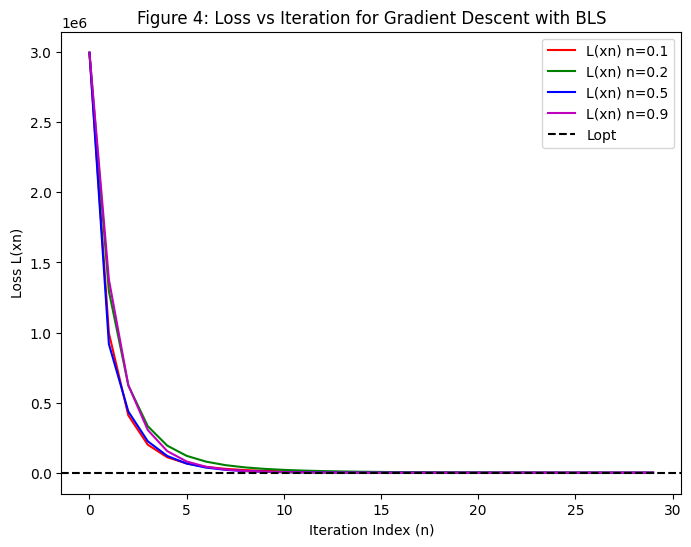

In [18]:
# Plot L(x) for each iteration. Loss was calculated during GD steps above.

plt.figure(figsize=(8, 6))
plt.plot(range(30), loss_bls_bn1, 'r-', label="L(xn) n=0.1")
plt.plot(range(30), loss_bls_bn2, 'g-', label="L(xn) n=0.2")
plt.plot(range(30), loss_bls_bn3, 'b-', label="L(xn) n=0.5")
plt.plot(range(30), loss_bls_bn4, 'm-', label="L(xn) n=0.9")
plt.axhline(y=Lopt, color='black', linestyle='dashed', label="Lopt")
plt.xlabel("Iteration Index (n)")
plt.ylabel("Loss L(xn)")
plt.title("Figure 4: Loss vs Iteration for Gradient Descent with BLS")
plt.legend()
plt.show()

Discussion for Problem 5, Figure 4

All of the different n learning rate hyperparameters converge on $L_{opt}$ in a reasonable number of iterations.  It appears that n=0.5 converges slightly faster than the other rates but they all appear to be pretty similar in performance.

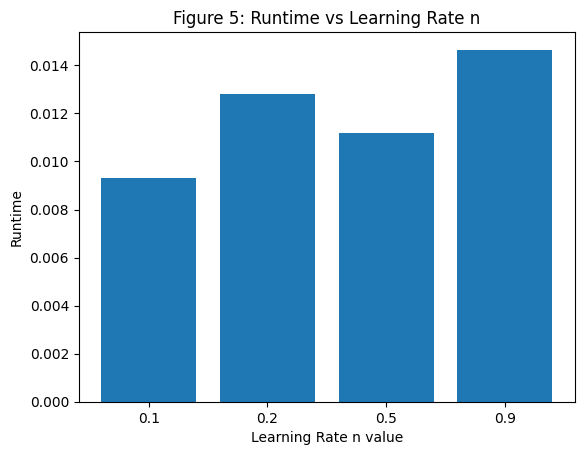

In [19]:
# calc runtimes for runtime calculation

runtime_bn1 = end_time_bn1 - start_time_bn1
runtime_bn2 = end_time_bn2 - start_time_bn2
runtime_bn3 = end_time_bn3 - start_time_bn3
runtime_bn4 = end_time_bn4 - start_time_bn4
runtime_c2 = end_time_c2 - start_time_c2

# Create the bar graph
categories = np.array(["0.1", "0.2", "0.5", "0.9"])
values = np.array([runtime_bn1, runtime_bn2, runtime_bn3, runtime_bn4])

plt.bar(categories, values)
plt.xlabel("Learning Rate n value")
plt.ylabel("Runtime")
plt.title("Figure 5: Runtime vs Learning Rate n")
plt.show()


Discussion for Problem 5, Figure 5

As the learning rate n increases, the runtime increases.  This is undoubtedly as a result of the loop to calculate next best $\gamma_n$. Since the fractional values are all less than 1, the larger number will only decrease $\gamma$ slightly and result in more $\gamma$ calculations until the threshold to exit the loop is reached.

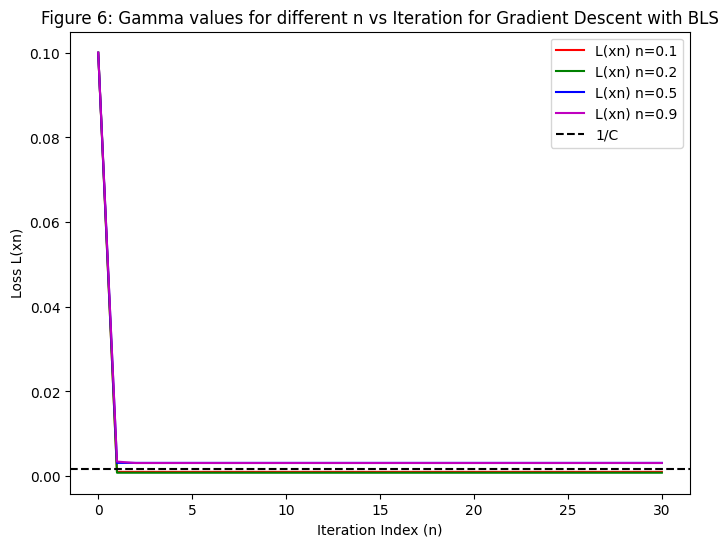

In [20]:
# Figure 6. Gamma vs Iterations
plt.figure(figsize=(8, 6))
plt.plot(range(31), gamma_bls_bn1, 'r-', label="L(xn) n=0.1")
plt.plot(range(31), gamma_bls_bn2, 'g-', label="L(xn) n=0.2")
plt.plot(range(31), gamma_bls_bn3, 'b-', label="L(xn) n=0.5")
plt.plot(range(31), gamma_bls_bn4, 'm-', label="L(xn) n=0.9")
plt.axhline(y=fixed_gamma, color='black', linestyle='dashed', label="1/C")
plt.xlabel("Iteration Index (n)")
plt.ylabel("Loss L(xn)")
plt.title("Figure 6: Gamma values for different n vs Iteration for Gradient Descent with BLS")
plt.legend()
plt.show()

Discussion for Problem 5, Figure 6

For all of the different n values, it appears that $\gamma_n$ is only updated once. For some $\gamma_n$ values you'll see that they are actually less than the 1/C threshold. That means that they might not actually converge to $L_{opt}$, however, from our other results we can see that this ultimately did not cause an issue.

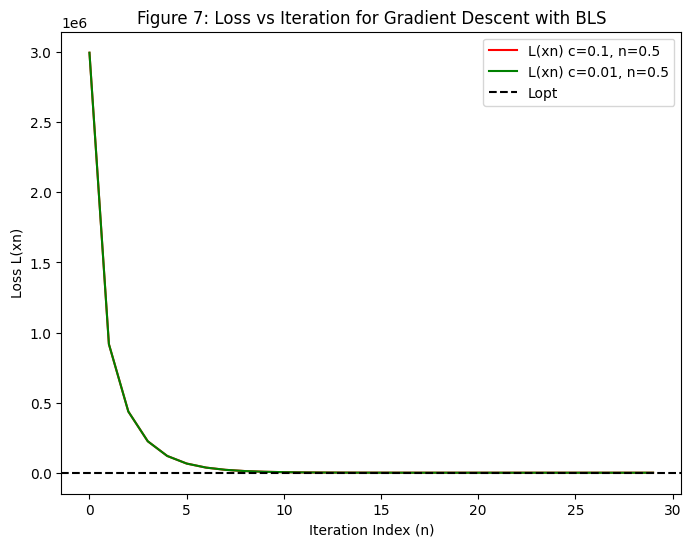

In [21]:
# Figure 7, different c values

# Plot L(x) for each iteration. Loss was calculated during GD steps above.

plt.figure(figsize=(8, 6))
plt.plot(range(30), loss_bls_bn3, 'r-', label="L(xn) c=0.1, n=0.5")
plt.plot(range(30), loss_bls_c2, 'g-', label="L(xn) c=0.01, n=0.5")
plt.axhline(y=Lopt, color='black', linestyle='dashed', label="Lopt")
plt.xlabel("Iteration Index (n)")
plt.ylabel("Loss L(xn)")
plt.title("Figure 7: Loss vs Iteration for Gradient Descent with BLS")
plt.legend()
plt.show()

Discussion for Problem 5, Figure 7

The curves for c=0.01 and c=0.1 are nearly identical.  It does not appear that this particular hyperparameter has much impact on the runtime of our search. From our $\gamma$ graphs, we know that $\gamma$ wasn't updated in most iterations and therefore c didn't contribute much to the solution. Alternatively, we may have needed to search a larger set of c values to find a value that makes a difference.

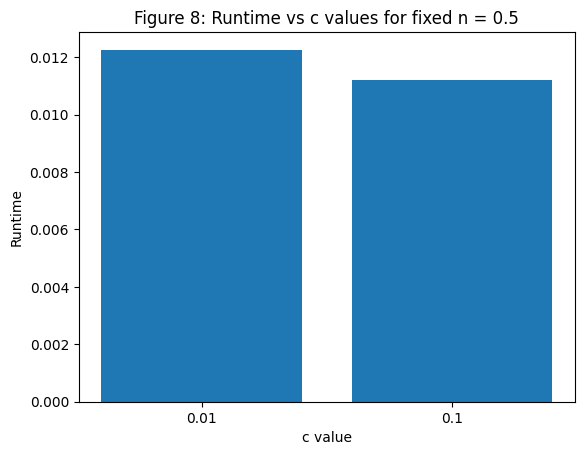

In [22]:
# Figure 8: bar graph for runtime with c
categories = np.array(["0.01", "0.1"])
values = np.array([runtime_c2, runtime_bn3])

plt.bar(categories, values)
plt.xlabel("c value")
plt.ylabel("Runtime")
plt.title("Figure 8: Runtime vs c values for fixed n = 0.5")
plt.show()

Discussion for Problem 5, Figure 8

As with Figure 8 being similar, the runtimes for c=0.01 and c=0.1 are nearly identical.  The smaller c value does run faster which is because of fewer internal loops.  However, from our graphs of $\gamma_n$ size over iteration, you can see that $\gamma_n$ is only updated on the first step. For the next 29 iterations the different c values are not making any difference because a new $\gamma_n$ is not calculated.

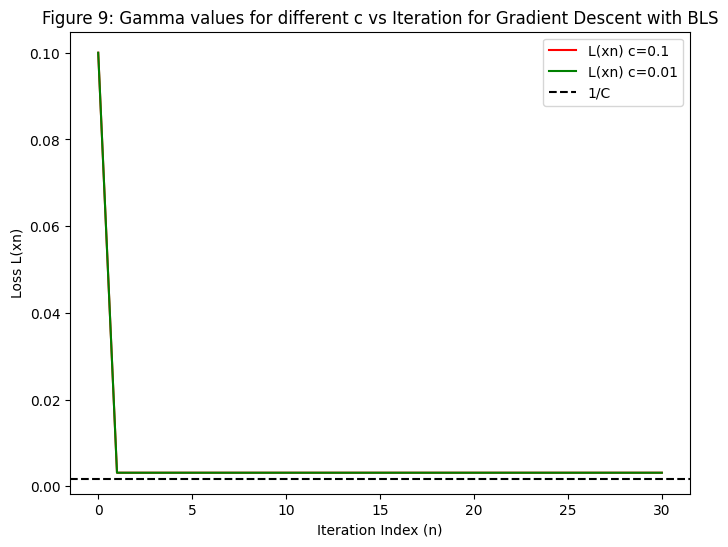

In [23]:
# Figure 9. Gamma vs Iterations
plt.figure(figsize=(8, 6))
plt.plot(range(31), gamma_bls_bn3, 'r-', label="L(xn) c=0.1")
plt.plot(range(31), gamma_bls_c2, 'g-', label="L(xn) c=0.01")
plt.axhline(y=fixed_gamma, color='black', linestyle='dashed', label="1/C")
plt.xlabel("Iteration Index (n)")
plt.ylabel("Loss L(xn)")
plt.title("Figure 9: Gamma values for different c vs Iteration for Gradient Descent with BLS")
plt.legend()
plt.show()

Discussion for Problem 5, Figure 9

As with Figure 6, there was only one adjustment to $\gamma_n$. This is similar to our previous discussion on $\gamma_n$ and there isn't anything to add.  Changing c didn't really impact our solution and this graph is more evidence of it.

## Reference List ##


We utilized current course notes, the "Linear Algebra for ML - Lab" colab notebook, python/numpy man pages, and online reference material for Singular-Value Decomposition and Gradient Descent to create this report.